In [56]:
import sys
import numpy as np
import GA as ga
import random 

equation_inputs = [4, -2, 7, -5, 11, 1]
num_weights = len(equation_inputs)
chromosomes = 50
mating = 25

random.seed(413)
new_population = np.random.uniform(low = -5.0, high = 5.0, size = (chromosomes, num_weights))

In [64]:
def cal_fitness(inputs, initial_population):
    ''' 
    We changed the cal_pop_fitness into cal_fitness
    This follows the equation: 
        y = w1 * (x1 ** 2) + w2 * (x2 ** 3) + (w3 * x3) + (w4 * x4) + (w5 * x5) + (w6 * x6)
    The equation has six inputs and six weights
    '''
    fitness = inputs[0] * (initial_population[:, 0] ** 2)   + \
              inputs[1] * (initial_population[:, 1] ** 3)   + \
              inputs[2] * (initial_population[:, 2])        + \
              inputs[3] * (initial_population[:, 3])        + \
              inputs[4] * (initial_population[:, 4])        + \
              inputs[5] * (initial_population[:, 5])
    return fitness

def crossover(parents, offspring_size, crossover_rate = 0.1):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]

        random.seed(413)
        crossover_prob = np.random.uniform(0.0, 0.8, 1)

        if crossover_prob < crossover_rate:
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            offspring[k, crossover_point: ] = parents[parent2_idx, crossover_point: ]
    return offspring

def mutation(offspring_crossover, mutations_rate):
    mutations_counter = np.uint8(offspring_crossover.shape[1])
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1

        random.seed(413)
        random_value  = np.random.uniform(-1.0, 1.0, 1)
        mutation_prob = np.random.uniform(-1.0, 1.0, 1)

        if mutation_prob < mutations_rate:
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

def main_genetic(equation_inputs, new_population, chromosomes, mating):
    num_weights = len(equation_inputs)
    sol_per_pop = chromosomes
    num_parents_mating = mating
    pop_size = (sol_per_pop, num_parents_mating)

    best_outputs = []
    num_generations = 1000

    crossover_rate = 0.8 
    mutations_rate = 0.1

    for generation in range(num_generations):
        fitness = cal_fitness(equation_inputs, new_population)
        best_outputs.append(np.max(np.sum(new_population * equation_inputs, axis = 1)))

        parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)

        offspring_size = (pop_size[0] - parents.shape[0], num_weights)
        offspring_crossover = crossover(parents, 
                                        offspring_size = offspring_size, 
                                        crossover_rate = crossover_rate)

        offspring_mutation  = mutation(offspring_crossover, 
                                       mutations_rate = mutations_rate)

        new_population[0:parents.shape[0], :] = parents
        new_population[parents.shape[0]:,  :] = offspring_mutation

    fitness = cal_fitness(equation_inputs, new_population)
    best_match_idx = np.where(fitness == np.max(fitness))
    
    print('Best approximate weight solution:  \t', np.round(new_population[best_match_idx, :], 2))
    print('Best approximate solution fitness: \t', np.round(fitness[best_match_idx][0], 3))
    return best_outputs

best_outputs = main_genetic(equation_inputs, new_population, chromosomes, mating)

Best approximate weight solution:  	 [[[-1.92000e+00 -4.67000e+00  3.00000e-02 -3.92000e+00  3.57000e+00
    2.74493e+03]]]
Best approximate solution fitness: 	 3022.959


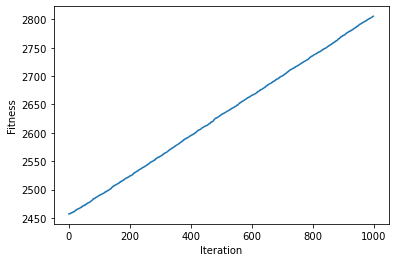

In [65]:
import matplotlib.pyplot as plt
plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()